In [1]:
# this can take some time...
import Statistics: median
using Test
using Plots
pyplot()
include("aleph_star/aleph_star.jl")
include("env/env_lane.jl")
include("ml/ml.jl")
include("ml/train_alephstar.jl");
include("ml/train_dqn.jl");
include("test.jl")


test (generic function with 1 method)

In [2]:
PTH = "/media/skariel/store/data/aleph_zero_data"
val_dtas = Vector{Float32}[]
tree_dtas = Vector{Float32}[]
tree_ranks = Vector{Float32}[]
val_dtdqn = Vector{Float32}[]
for fn in readdir(PTH)
    @show fn
    fn = joinpath(PTH, fn)
    if occursin("dtas",fn)
        @load fn dtas
        push!(val_dtas, dtas.val_rewards)
        push!(tree_dtas, dtas.rewards)
        push!(tree_ranks, dtas.ranks)
    else
        @load fn dtdqn
        push!(val_dtdqn, dtdqn.val_rewards)
        @show dtdqn.epsilon0
    end
end

fn = "_dtas.jld2"
fn = "a_dtas3.jld2"
fn = "dtas.jld2"
fn = "dtas2.jld2"
fn = "dtas3.jld2"
fn = "dtas4.jld2"
fn = "dtdqn.jld2"
dtdqn.epsilon0 = 1.0
fn = "dtdqn2.jld2"
dtdqn.epsilon0 = 1.0
fn = "dtdqn3.jld2"
dtdqn.epsilon0 = 0.5
fn = "dtdqn4.jld2"
dtdqn.epsilon0 = 0.5
fn = "n_dtas1.jld2"
fn = "n_dtdqn1.jld2"
dtdqn.epsilon0 = 1.0


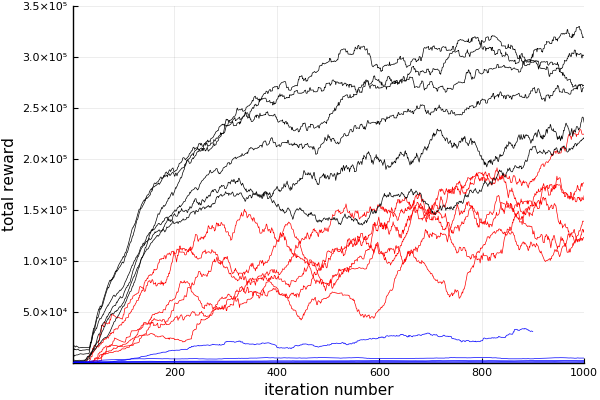

In [3]:
plot(1  .+moving_avg(val_dtas[1], 100), lw=0.5, lc=:red, xlabel="iteration number")
plot!(1 .+moving_avg(val_dtas[2], 100), lw=0.5, lc=:red, ylabel="total reward")
#plot!(1 .+moving_avg(val_dtas[3], 100), lw=0.5, lc=:red)
plot!(1 .+moving_avg(val_dtas[4], 100), lw=0.5, lc=:red)
plot!(1 .+moving_avg(val_dtas[5], 100), lw=0.5, lc=:red)
plot!(1 .+moving_avg(val_dtas[6], 100), lw=0.5, lc=:red)
plot!(1 .+moving_avg(val_dtas[7], 100), lw=0.5, lc=:red)

plot!(1  .+moving_avg(tree_dtas[1], 100), lw=0.5, lc=:black, xlabel="iteration number")
plot!(1 .+moving_avg(tree_dtas[2], 100), lw=0.5, lc=:black, ylabel="total reward")
#plot!(1 .+moving_avg(tree_dtas[3], 100), lw=0.5, lc=:red)
plot!(1 .+moving_avg(tree_dtas[4], 100), lw=0.5, lc=:black)
plot!(1 .+moving_avg(tree_dtas[5], 100), lw=0.5, lc=:black)
plot!(1 .+moving_avg(tree_dtas[6], 100), lw=0.5, lc=:black)
plot!(1 .+moving_avg(tree_dtas[7], 100), lw=0.5, lc=:black)

plot!(1 .+moving_avg(val_dtdqn[1], 100), lw=0.5, lc=:blue)
plot!(1 .+moving_avg(val_dtdqn[2], 100), lw=0.5, lc=:blue)
plot!(1 .+moving_avg(val_dtdqn[3], 100), lw=0.5, lc=:blue)
plot!(1 .+moving_avg(val_dtdqn[4], 100), lw=0.5, lc=:blue)
plot!(1 .+moving_avg(val_dtdqn[5], 100), lw=0.5, lc=:blue, ylims=(100,3.5e5), xlims=(1,1000), leg=false)


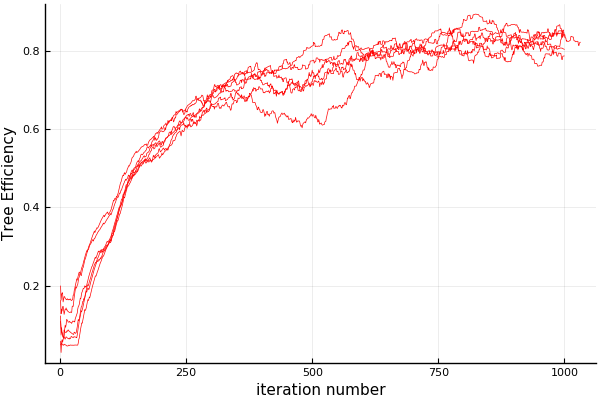

In [4]:
plot(moving_avg(tree_ranks[1]/5500, 100), lw=0.5, lc=:red, xlabel="iteration number")
plot!(moving_avg(tree_ranks[2]/5500, 100), lw=0.5, lc=:red, xlabel="iteration number")
plot!(moving_avg(tree_ranks[4]/5500, 100), lw=0.5, lc=:red, xlabel="iteration number")
plot!(moving_avg(tree_ranks[5]/5500, 100), lw=0.5, lc=:red, xlabel="iteration number")
plot!(moving_avg(tree_ranks[6]/5500, 100), lw=0.5, lc=:red, xlabel="iteration number")
plot!(moving_avg(tree_ranks[7]/5500, 100), lw=0.5, lc=:red, xlabel="iteration number", leg=false, ylabel="Tree Efficiency")